In [612]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
from matplotlib.patches import Patch


In [613]:
# Load the data
file_path = "../data/interim/ordinal.csv"
data = pd.read_csv(file_path)

file_path = "../data/raw/RTA_Dataset.csv"
data_raw = pd.read_csv(file_path)

In [614]:
cause_to_class = {
    'Driving under the influence of drugs': 'DUI',
    'Drunk driving': 'DUI',
    'Moving Backward': 'Improper Driving and Maneuvers',
    'Overtaking': 'Improper Driving and Maneuvers',
    'Changing lane to the left': 'Improper Driving and Maneuvers',
    'Changing lane to the right': 'Improper Driving and Maneuvers',
    'Driving to the left': 'Improper Driving and Maneuvers',
    'Overturning': 'Improper Driving and Maneuvers',
    'Turnover': 'Improper Driving and Maneuvers',
    'Driving carelessly': 'Improper Driving and Maneuvers',
    'Improper parking': 'Improper Driving and Maneuvers',
    'Getting off the vehicle improperly': 'Improper Driving and Maneuvers',
    'Overspeed': 'Speeding',
    'Driving at high speed': 'Speeding',
    'Overloading': 'Violations of Traffic Rules',
    'No priority to vehicle': 'Violations of Traffic Rules',
    'No priority to pedestrian': 'Violations of Traffic Rules',
    'No distancing': 'Violations of Traffic Rules',
    'Other': 'Other Causes',
    np.nan: 'Other Causes'
}

# Assign class
data['Class'] = data['Cause_of_accident'].map(cause_to_class).fillna('Other Causes')

# Basic Analysis

In [615]:
total_crashes = len(data)  # Total number of crashes
deadly_crashes = np.count_nonzero(data['Accident_severity'] == 0)  # Number of deadly crashes

percentage_deadly_crashes = (deadly_crashes / total_crashes) * 100
print("Percentage of deadly crashes:", percentage_deadly_crashes)

Percentage of deadly crashes: 1.2828840532640466


In [616]:
total_crashes = len(data)  # Total number of crashes
servere_crashes = np.count_nonzero(data['Accident_severity'] == 1)  # Number of deadly crashes

percentage_servere_crashes = (servere_crashes / total_crashes) * 100
print("Percentage of servere crashes:", percentage_servere_crashes)

Percentage of servere crashes: 14.152322182526794


In [617]:
total_crashes = len(data)  # Total number of crashes
non_servere_crashes = np.count_nonzero(data['Accident_severity'] == 2)  # Number of deadly crashes

percentage_non_servere_crashes = (non_servere_crashes / total_crashes) * 100
print("Percentage of non servere crashes:", percentage_non_servere_crashes)

Percentage of non servere crashes: 84.56479376420916


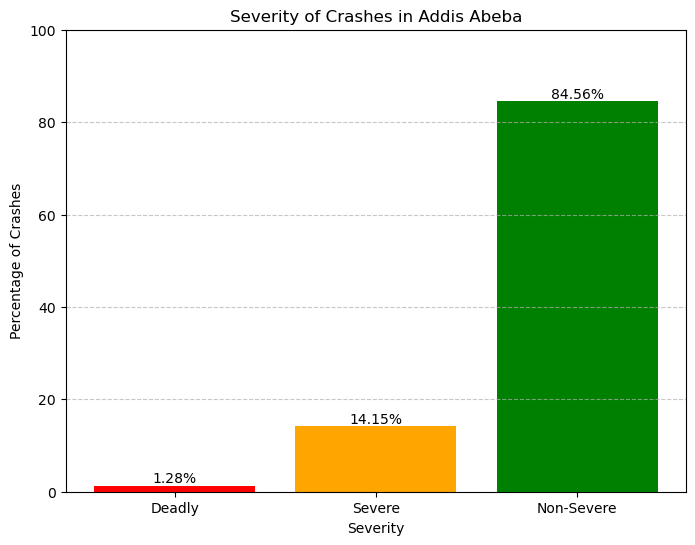

In [618]:
# Data for plotting
categories = ['Deadly', 'Severe', 'Non-Severe']
percentages = [percentage_deadly_crashes, percentage_servere_crashes, percentage_non_servere_crashes]

# Creating the plot
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, percentages, color=['red', 'orange', 'green'])
plt.xlabel('Severity')
plt.ylabel('Percentage of Crashes')
plt.ylim(0, 100)  # Setting the y-axis limits to 0-100
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Severity of Crashes in Addis Abeba")
# Adding numbers to the bars
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.2f}%', 
             ha='center', va='bottom', color='black', fontsize=10)

plt.show()

## Deadly Crash Plot

In [619]:
total_crashes = len(data)  # Total number of crashes
deadly_crashes = np.count_nonzero(data['Accident_severity'] == 0)  # Number of deadly crashes
percentage_deadly_crashes_addis = (deadly_crashes / total_crashes) * 100
print("Percentage of deadly crashes:", percentage_deadly_crashes)

Percentage of deadly crashes: 1.2828840532640466


In [651]:
# https://stadt.muenchen.de/infos/statistik-verkehr.html
# https://www.sueddeutsche.de/muenchen/polizei-muenchen-unfalltote-statistik-tiefstand-1.6389200

total_crashes = 39887
deadly_crashes = 22

# Calculate percentages
percentage_deadly_crashes_munich = (deadly_crashes / total_crashes) * 100

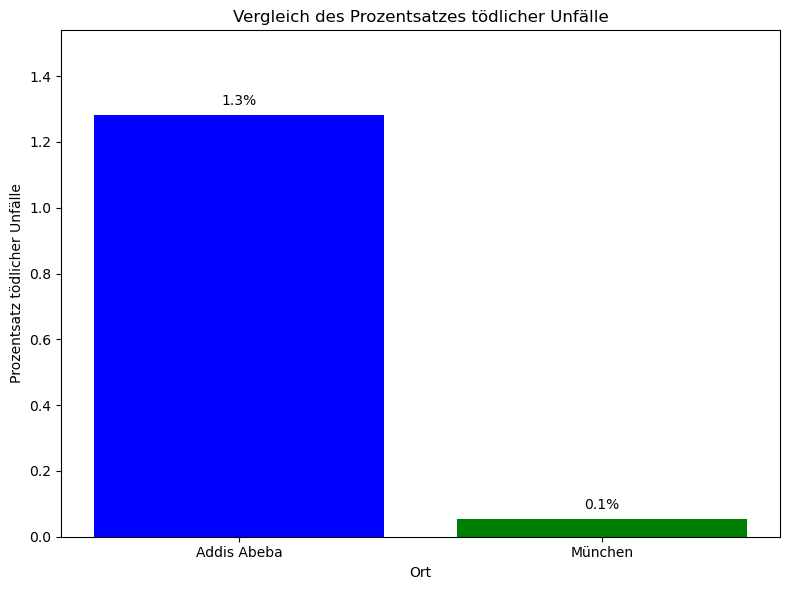

In [656]:
# Data
cities = ['Addis Abeba', 'München']
percentage = [percentage_deadly_crashes_addis,percentage_deadly_crashes_munich]

# Create Barplot
plt.figure(figsize=(8, 6))
bars = plt.bar(cities, percentage, color=['blue', 'green'])

# Annnotate
plt.xlabel('Ort')
plt.ylabel('Prozentsatz tödlicher Unfälle')
plt.title('Vergleich des Prozentsatzes tödlicher Unfälle')
plt.ylim(0, max(percentage) * 1.2)  # y-Achsen-Limit etwas über dem Maximum für bessere Visualisierung setzen

# Annotate the values above the vars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{round(yval, 1)}%', ha='center', va='bottom')

# Diagramm anzeigen
plt.tight_layout()
plt.show()

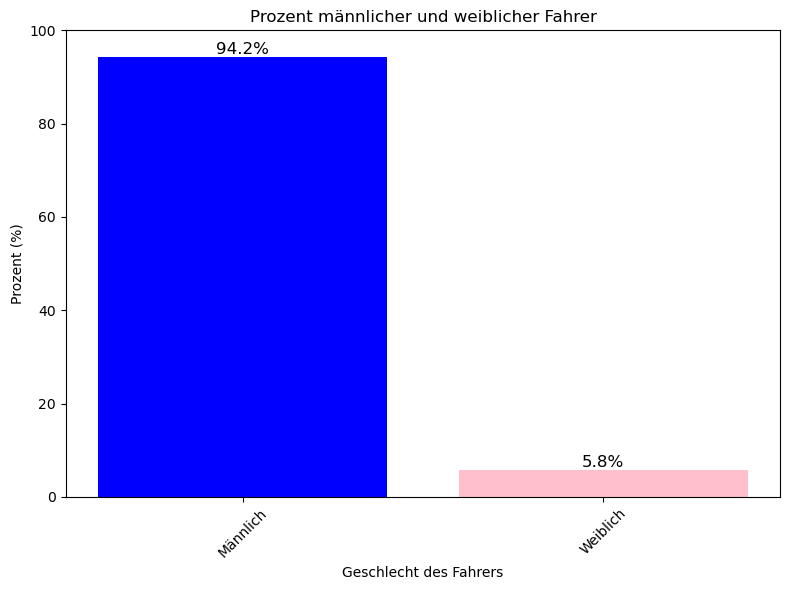

In [624]:
# Calculate the proportion of male and female drivers
male_count = sum(data['Sex_of_driver'] == "Male")
female_count = sum(data['Sex_of_driver'] == "Female")
total_count = male_count + female_count

male_proportion = male_count / total_count
female_proportion = female_count / total_count


# Convert proportions to percentages
male_percentage = male_proportion * 100
female_percentage = female_proportion * 100

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(['Männlich', 'Weiblich'], [male_percentage, female_percentage], color=['blue', 'pink'])
plt.xlabel('Geschlecht des Fahrers')
plt.ylabel('Prozent (%)')
plt.title('Prozent männlicher und weiblicher Fahrer')
plt.ylim(0, 100)  # Adjust y-axis limit to accommodate percentages
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary

# Add text annotations with percentages above each bar
for bar, percentage in zip(bars, [male_percentage, female_percentage]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%', 
             ha='center', va='bottom', fontsize=12, color='black')

# Show the plot
plt.tight_layout()
plt.show()

# Analysis of association between crash causes and other factors

In [625]:
results = []

for column in data.drop(columns=["Cause_of_accident"]).columns:
    grouped_data = pd.crosstab(data[column], data['Cause_of_accident'])
    # Perform chi-squared test
    chi2, p, dof, expected = chi2_contingency(grouped_data)
    n = int(expected.sum())  # Total number of observations
    results.append({
        'Column': column,
        'Chi-squared': chi2,
        'p-value': p,
        'Degrees of freedom': dof,
        'n': n
    })


In [626]:
# Convert the results list to a DataFrame
results_cause_df = pd.DataFrame(results)
# Apply Bonferroni correction
alpha = 0.05
num_tests = 14
bonferroni_alpha = alpha / num_tests

# Filter the results to only include significant p-values after Bonferroni correction
results_cause_df.query("`p-value` < @bonferroni_alpha")
results_cause_df.query("`p-value` < @alpha")

,Column,Chi-squared,p-value,Degrees of freedom,n
7,Road_surface_type,103.458587,0.008928,72,12119
14,Time_of_day,93.399903,0.000703,54,12291
15,Class,49164.000000,0.000000,72,12290


# Anaylisis of Daytime, but not light conditions

In [627]:
# Assuming your dataframe is named 'data'
data['Light_conditions_cleaned'] = data['Light_conditions'].replace(['Darkness - lights lit', 'Darkness - no lighting', 'Darkness - lights unlit'], 'Darkness')


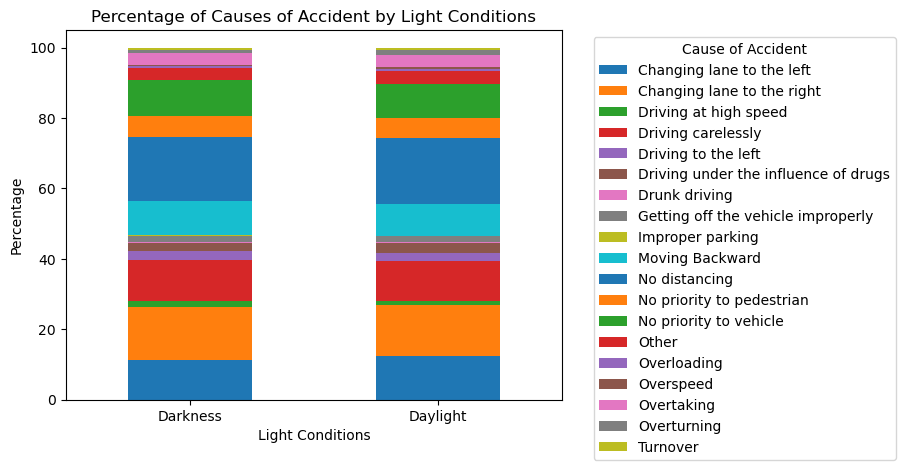

In [628]:
# Grouping the data by 'Light_conditions_cleaned' and 'Cause_of_accident'
grouped_data = pd.crosstab(data['Light_conditions_cleaned'], data['Cause_of_accident'])

# Calculating percentages
grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Plotting
grouped_data_percentage.plot(kind='bar', stacked=True)
plt.title('Percentage of Causes of Accident by Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Cause of Accident', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [629]:
# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(grouped_data)
# Print the results
print("Chi-squared test statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

Chi-squared test statistic: 26.40376963489041
p-value: 0.09087789628648307
Degrees of freedom: 18


## Analysis and Visualization of Time of the Day and Crash Causes

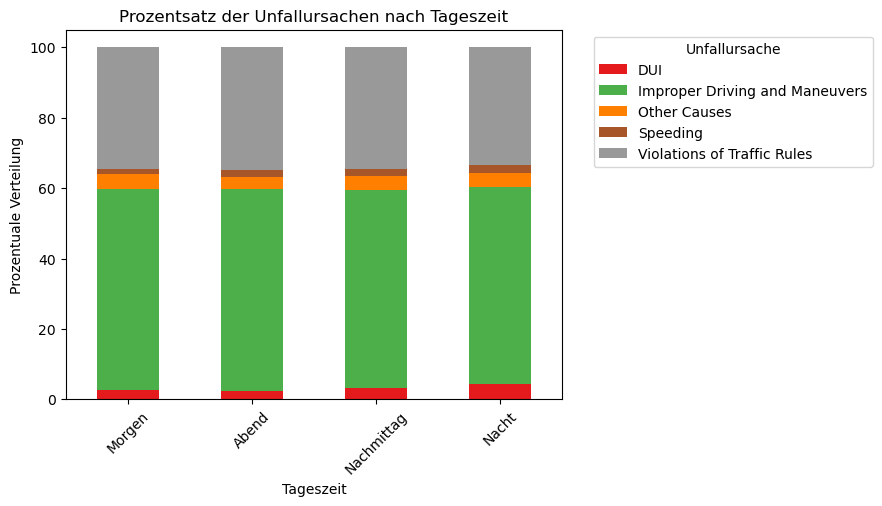

In [630]:
# Definiere geordnete Kategorien für die Tageszeit
time_of_day_order = pd.CategoricalDtype(categories=['Morning', 'Evening', 'Afternoon', 'Night'], ordered=True)
data['Time_of_day'] = data['Time_of_day'].astype(time_of_day_order)

# Gruppierung der Daten nach 'Light_conditions_cleaned' und 'Cause_of_accident'
grouped_data = pd.crosstab(data['Time_of_day'], data['Class'])

# Berechnung der Prozentsätze
grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Plot
grouped_data_percentage.plot(kind='bar', stacked=True, colormap='Set1')

plt.title('Prozentsatz der Unfallursachen nach Tageszeit')
plt.xlabel('Tageszeit')
plt.ylabel('Prozentuale Verteilung')
plt.legend(title='Unfallursache', bbox_to_anchor=(1.05, 1), loc='upper left')

# X-Achsenbeschriftungen auf Deutsch übersetzen
plt.xticks(ticks=range(len(data['Time_of_day'].cat.categories)), 
           labels=['Morgen', 'Abend', 'Nachmittag', 'Nacht'], rotation=45)

plt.show()


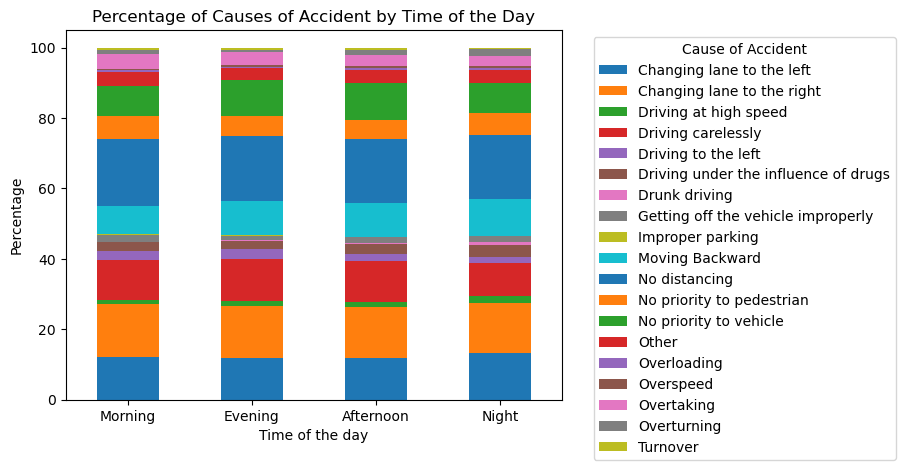

In [631]:
time_of_day_order = pd.CategoricalDtype(categories=['Morning', 'Evening', 'Afternoon', 'Night'], ordered=True)
data['Time_of_day'] = data['Time_of_day'].astype(time_of_day_order)

# Grouping the data by 'Light_conditions_cleaned' and 'Cause_of_accident'
grouped_data = pd.crosstab(data['Time_of_day'], data['Cause_of_accident'])

# Calculating percentages
grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Plotting
grouped_data_percentage.plot(kind='bar', stacked=True)
plt.title('Percentage of Causes of Accident by Time of the Day')
plt.xlabel('Time of the day')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Cause of Accident', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Crashes per Hour

C:\Users\Max_G\AppData\Local\Temp\ipykernel_10068\728723264.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_raw['Time'] = pd.to_datetime(data_raw['Time'])


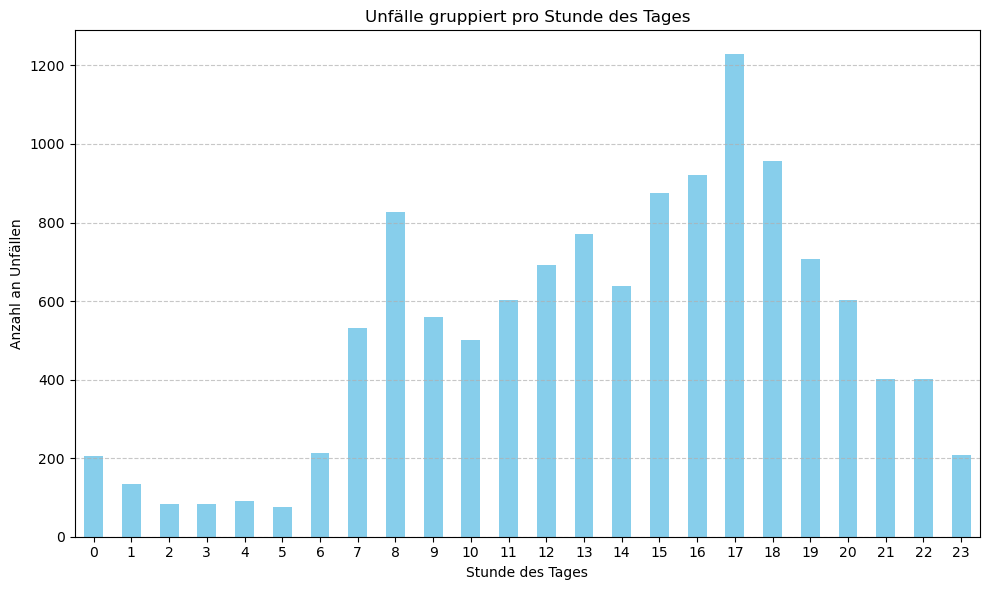

In [632]:
data_raw['Time'] = pd.to_datetime(data_raw['Time'])

hourly_counts =data_raw.groupby(data_raw['Time'].dt.hour).size()

plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar', color='skyblue')
plt.title('Unfälle gruppiert pro Stunde des Tages')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl an Unfällen')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Analysis of DUI-related crashes during the wake of the day

In [633]:
time_of_day = ['Morgens', 'Mittags', 'Abends', 'Nachts']
drunk_driving = grouped_data_percentage["Drunk driving"]
under_influence_of_drugs = grouped_data_percentage['Driving under the influence of drugs']

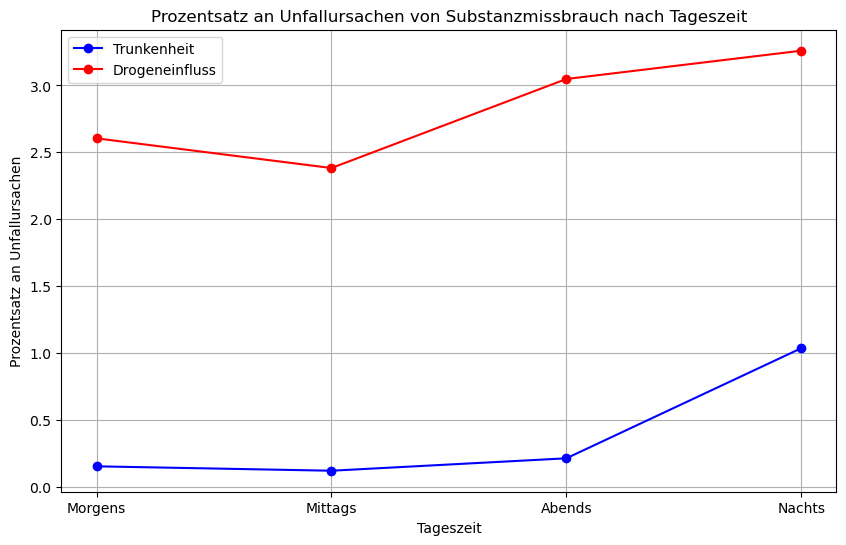

In [634]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(time_of_day, drunk_driving, marker='o', color='blue', label='Trunkenheit')
plt.plot(time_of_day, under_influence_of_drugs, marker='o', color='red', label='Drogeneinfluss')

# Beschriftungen und Titel
plt.xlabel('Tageszeit')
plt.ylabel('Prozentsatz an Unfallursachen')
plt.title('Prozentsatz an Unfallursachen von Substanzmissbrauch nach Tageszeit')
plt.legend()

# Anzeige des Diagramms
plt.grid(True)
plt.show()

## Analysis of Accident Frequency

In [635]:
# Calculate the frequency of each cause
frequency = data['Cause_of_accident'].value_counts()

# Calculate the probability of each cause
probability = frequency / len(data)

# Combine into a DataFrame
cause_stats = pd.DataFrame({'Frequency': frequency, 'Probability': probability})
# Select the top 10 causes
top_10_causes = cause_stats.head(10)


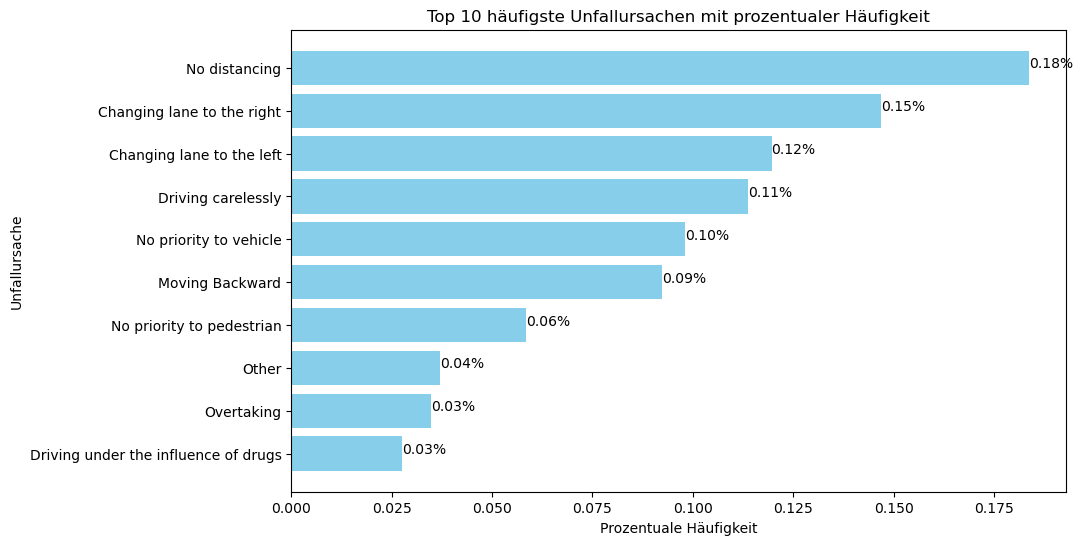

In [636]:
# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_causes.index, top_10_causes['Probability'], color='skyblue')
plt.xlabel('Prozentuale Häufigkeit')
plt.ylabel('Unfallursache')
plt.title('Top 10 häufigste Unfallursachen mit prozentualer Häufigkeit')
plt.gca().invert_yaxis()  # Um die höchste Wahrscheinlichkeit oben anzuzeigen
for index, value in enumerate(top_10_causes['Probability']):
    plt.text(value, index, f'{value:.2f}%')
plt.show()

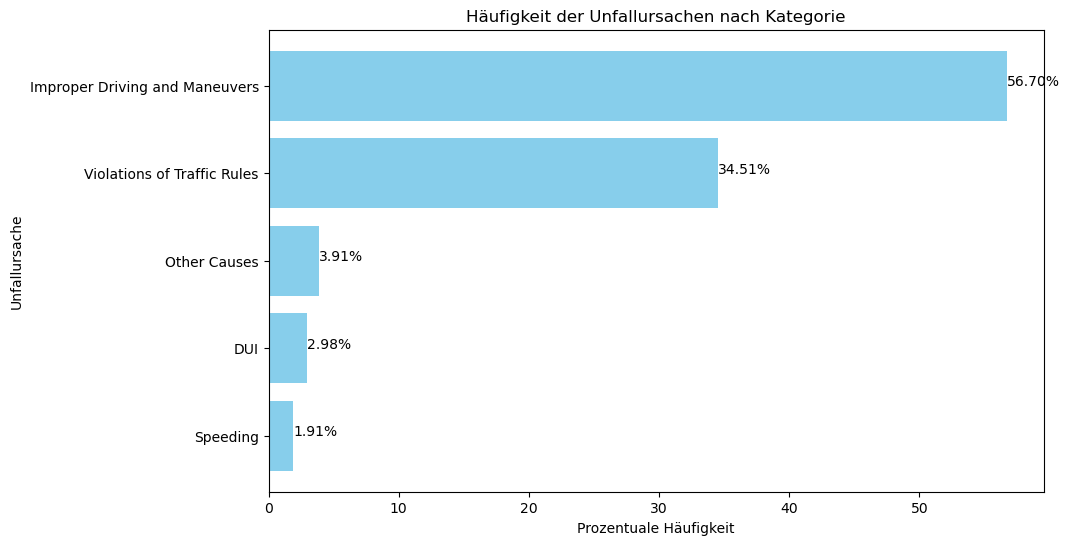

In [637]:
# Count the occurrences of each class
class_counts = data['Class'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(class_counts.index, class_counts.values, color='skyblue')
plt.xlabel('Prozentuale Häufigkeit')
plt.ylabel('Unfallursache')
plt.title('Häufigkeit der Unfallursachen nach Kategorie')
plt.gca().invert_yaxis()  # Um die höchste Wahrscheinlichkeit oben anzuzeigen
for index, value in enumerate(class_counts.values):
    plt.text(value, index, f'{value:.2f}%')
plt.show()

# Analysis of Accidenty Severity

## Now testing all collums for statistical significance

In [638]:
results = []

for column in data.drop(columns=["Accident_severity", "Light_conditions_cleaned"]).columns:
    grouped_data = pd.crosstab(data[column], data['Accident_severity'])
    # Perform chi-squared test
    chi2, p, dof, expected = chi2_contingency(grouped_data)
    n = int(expected.sum())  # Total number of observations

    results.append({
        'Column': column,
        'Chi-squared': chi2,
        'p-value': p,
        'Degrees of freedom': dof,
        'n': n
    })

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)


In [639]:
# Apply Bonferroni correction
alpha = 0.05
num_tests = 14
bonferroni_alpha = alpha / num_tests

# Filter the results to only include significant p-values after Bonferroni correction
results_df.query("`p-value` < @bonferroni_alpha")

,Column,Chi-squared,p-value,Degrees of freedom,n
0,Age_band_of_driver,33.769702,7.452442e-06,6,10768
6,Types_of_Junction,53.918144,2.826192e-07,12,11238
8,Light_conditions,45.024542,4.627954e-08,6,12316
9,Weather_conditions,35.321031,1.317432e-03,14,12023
14,Time_of_day,49.341949,6.368617e-09,6,12315


## Crash Severity During the Day

C:\Users\Max_G\AppData\Local\Temp\ipykernel_10068\375528840.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = data.groupby(['Time_of_day', 'Accident_severity']).size().reset_index(name='total_counts')
C:\Users\Max_G\AppData\Local\Temp\ipykernel_10068\375528840.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentage_counts = total_counts.groupby('Time_of_day').apply(lambda x: x.assign(percentage=x['total_counts'] / x['total_counts'].sum() * 100))
C:\Users\Max_G\AppData\Local\Temp\ipykernel_10068\375528840.py:22: UserWarning: The palette list has more values (9) than needed (3), which ma

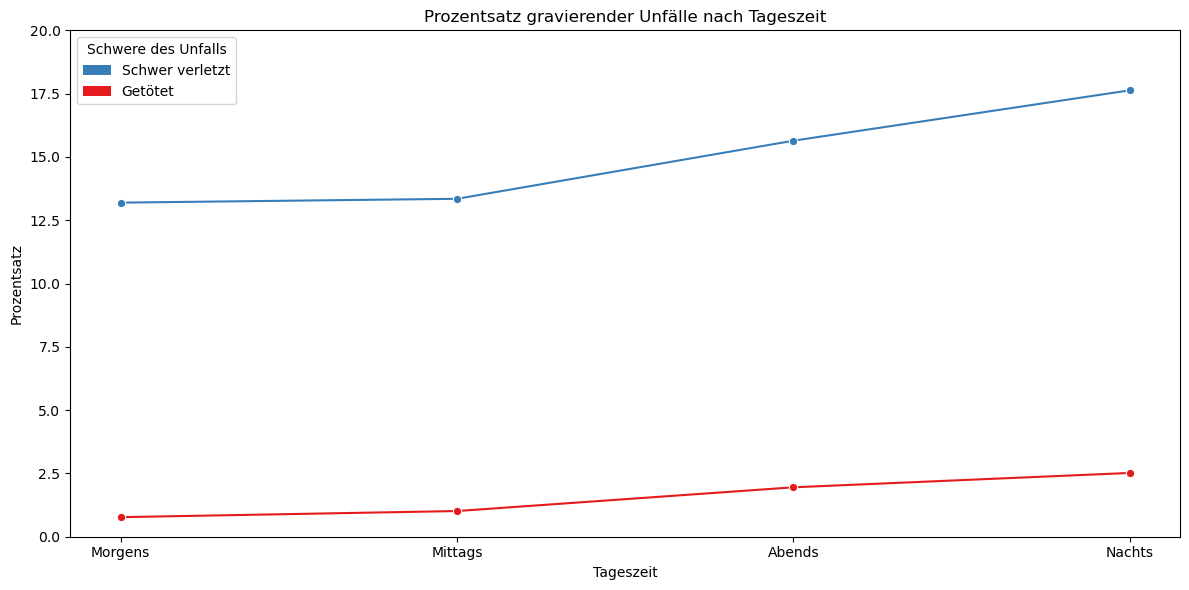

In [640]:
# Define the order of time of day
time_of_day_order = ['Morning', 'Afternoon', 'Evening', 'Night']

# Convert 'Time_of_day' to categorical with the defined order
data['Time_of_day'] = pd.Categorical(data['Time_of_day'], categories=time_of_day_order, ordered=True)

# Calculate percentages
total_counts = data.groupby(['Time_of_day', 'Accident_severity']).size().reset_index(name='total_counts')
percentage_counts = total_counts.groupby('Time_of_day').apply(lambda x: x.assign(percentage=x['total_counts'] / x['total_counts'].sum() * 100))

# Convert 'Accident_severity' column to strings
percentage_counts['Accident_severity'] = percentage_counts['Accident_severity'].astype(str)

# Define custom legend elements (Patches) with specific colors
legend_elements = [
    Patch(facecolor=sns.color_palette('Set1')[1], label='Schwer verletzt'),
    Patch(facecolor=sns.color_palette('Set1')[0], label='Getötet')
]

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=percentage_counts, x='Time_of_day', y='percentage', hue='Accident_severity', marker='o',
             palette=sns.color_palette('Set1'))
plt.xticks(ticks=[0, 1, 2, 3], labels=['Morgens', 'Mittags', 'Abends', 'Nachts'])

plt.title('Prozentsatz gravierender Unfälle nach Tageszeit')
plt.xlabel('Tageszeit')
plt.ylabel('Prozentsatz')
plt.ylim(0, 20) 

# Custom legend using predefined legend elements
plt.legend(handles=legend_elements, title='Schwere des Unfalls')

plt.tight_layout()
plt.show()


## Severity with respect to age

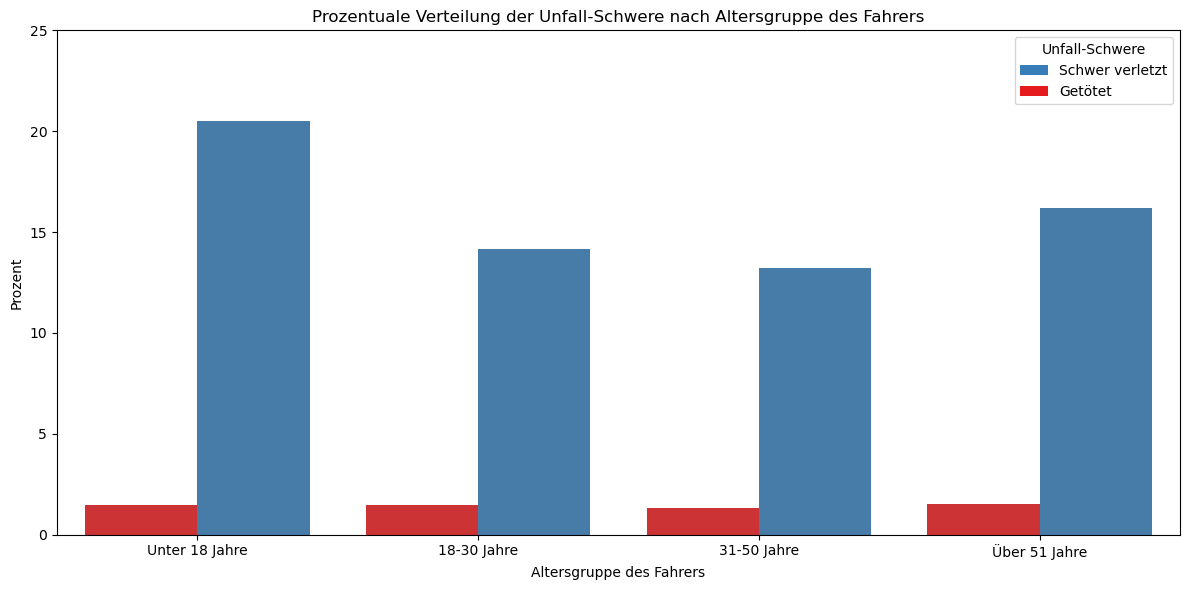

In [641]:
# Calculate percentages
total_counts = data.groupby(['Age_band_of_driver', 'Accident_severity']).size().reset_index(name='total_counts')
percentage_counts = total_counts.groupby('Age_band_of_driver').apply(lambda x: x.assign(percentage=x['total_counts'] / x['total_counts'].sum() * 100))

# Convert 'Accident_severity' column to strings
percentage_counts['Accident_severity'] = percentage_counts['Accident_severity'].astype(str)
percentage_counts_filtered = percentage_counts[percentage_counts['Accident_severity'] != str(2)]

legend_elements = [
    Patch(facecolor=sns.color_palette('Set1')[1], label='Schwer verletzt'),
    Patch(facecolor=sns.color_palette('Set1')[0], label='Getötet')
]

# Create the figure
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=percentage_counts_filtered, x='Age_band_of_driver', y='percentage', hue='Accident_severity',
                 palette='Set1')
ax.set_xticklabels(['Unter 18 Jahre', '18-30 Jahre', '31-50 Jahre', 'Über 51 Jahre'])
plt.title('Prozentuale Verteilung der Unfall-Schwere nach Altersgruppe des Fahrers')
plt.xlabel('Altersgruppe des Fahrers')
plt.ylim(0, 25)
plt.ylabel('Prozent')
plt.legend(handles=legend_elements, title='Unfall-Schwere', loc='upper right')
plt.tight_layout()
plt.show()

## Proportion of Collisions (here because of the following Z-Test related to crash severity)

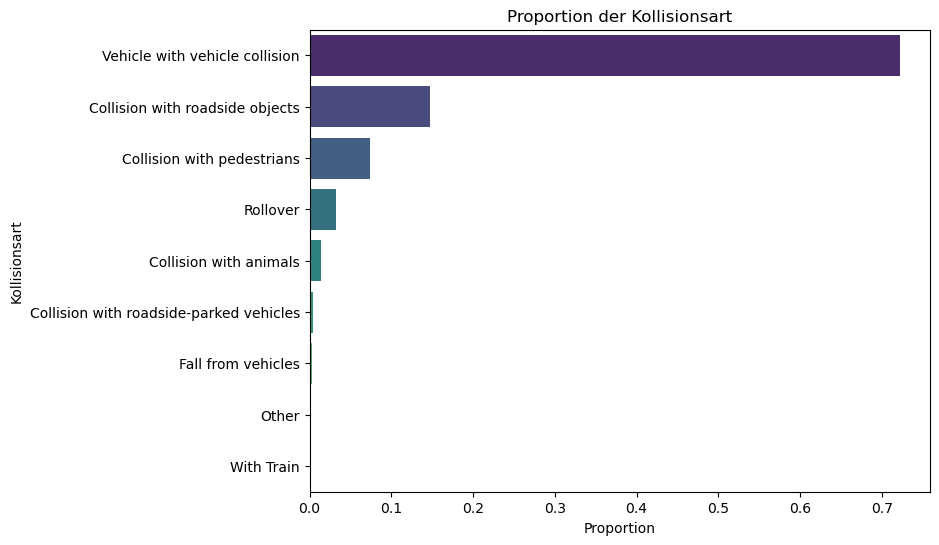

In [642]:
# Assuming your column is named 'collision_type'
proportions = data['Type_of_collision'].value_counts(normalize=True)
plt.figure(figsize=(8, 6))
sns.barplot(x=proportions.values, y=proportions.index, palette='viridis')
plt.title('Proportion der Kollisionsart')
plt.xlabel('Proportion')
plt.ylabel('Kollisionsart')
plt.show()

### Z test for crash severity

In [643]:
pedestrian_crash = data.query("Type_of_collision == 'Collision with pedestrians'")
non_pedestrian_crash = data.query("Type_of_collision != 'Collision with pedestrians'")

count_zeros_pedestrian = sum(pedestrian_crash['Accident_severity'] == 0)
count_zeros_non_pedestrian = sum(non_pedestrian_crash['Accident_severity'] == 0)

In [644]:


# Perform z-test of proportions
nobs = np.array([len(pedestrian_crash), len(non_pedestrian_crash)])
count = np.array([count_zeros_pedestrian, count_zeros_non_pedestrian])

z_stat, p_value = proportions_ztest(count, nobs)

# Print the results
print(f'Z-statistic: {z_stat:.4f}')
print(f'P-value: {p_value:.4f}')

Z-statistic: 3.2387
P-value: 0.0012


### Visualization of Crash Proportion

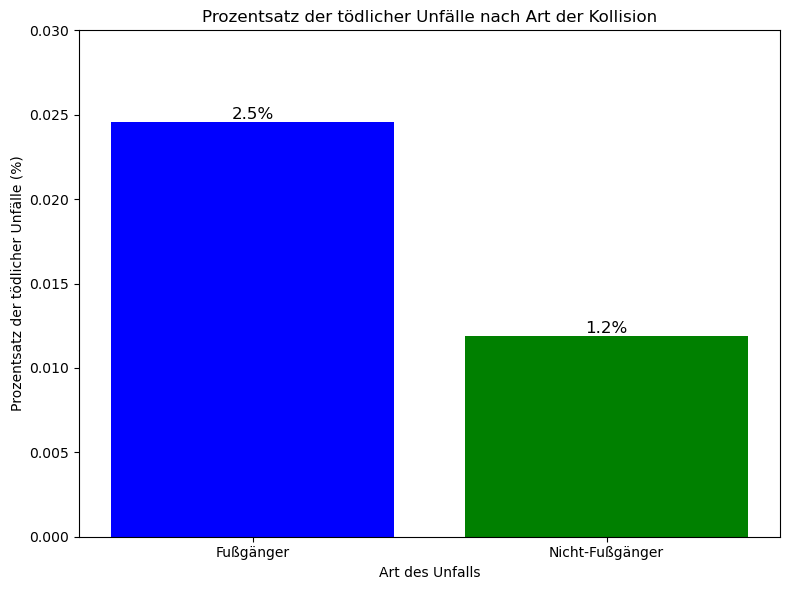

In [645]:
# Calculate proportion of zeros in Accident_severity column for each subset
prop_zeros_pedestrian = (pedestrian_crash['Accident_severity'] == 0).mean()
prop_zeros_non_pedestrian = (non_pedestrian_crash['Accident_severity'] == 0).mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(['Fußgänger', 'Nicht-Fußgänger'], [prop_zeros_pedestrian, prop_zeros_non_pedestrian], 
               color=['blue', 'green'])
plt.xlabel('Art des Unfalls')
plt.ylabel('Prozentsatz der tödlicher Unfälle (%)')
plt.title('Prozentsatz der tödlicher Unfälle nach Art der Kollision')
plt.ylim(0, 0.03)  # Set y-axis limit from 0 to 1 for proportions


# Add labels with percentages above each bar
for bar, proportion in zip(bars, [prop_zeros_pedestrian, prop_zeros_non_pedestrian]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{proportion:.1%}', 
             ha='center', va='bottom', fontsize=12, color='black')

# Show the plot
plt.tight_layout()
plt.show()

## Analysis if lorries are more involved in backwards driving crashes

In [646]:
# Assuming 'data_raw' is your DataFrame
filtered_data = data_raw.query("Cause_of_accident == 'Moving Backward'")

# Define the lorry types
lorry_types = ['Long lorry', 'Lorry (41?100Q)', 'Lorry (11?40Q)']

# Filter for rows with the lorry types
lorry_data_moving_backwards = filtered_data[filtered_data['Type_of_vehicle'].isin(lorry_types)]
lorry_data_all = data_raw[data_raw['Type_of_vehicle'].isin(lorry_types)]

# Count the occurrences of lorry types
lorry_count_backwards = lorry_data_moving_backwards.shape[0]
lorry_count_all = lorry_data_all.shape[0]

In [647]:
lorry_count_backwards / len(filtered_data )

0.24274406332453827

In [648]:
lorry_count_all  / len(data_raw)

0.25251705099058136